In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib

In [2]:
cd ..

/workspaces/project7


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
df =  pd.read_csv("data/application_train.csv")

## train

In [4]:
df_train = df
y = df_train['TARGET']
X = df_train.drop(columns='TARGET')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

In [5]:
y = df_train['TARGET']
X = df_train.drop(columns='TARGET')
dX_train, dX_test, dy_train, dy_test = train_test_split(X, y, test_size=1000, random_state=42)
dX_test.to_csv('data_test.csv') 

In [6]:
dict(dX_test.set_index('SK_ID_CURR').dtypes)

{'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMBERS': dtype('float64'),
 'REGION_RATING_CLIENT': dtype('in

In [7]:
y_test_index = list(X_test["SK_ID_CURR"])
y_test.index = y_test_index
y_train_index = list(X_train["SK_ID_CURR"])
y_train.index = y_train_index

In [8]:
test = df_train.set_index(keys='SK_ID_CURR')
list(test.loc[100004,:])

[0,
 'Revolving loans',
 'M',
 'Y',
 'Y',
 0,
 67500.0,
 135000.0,
 6750.0,
 135000.0,
 'Unaccompanied',
 'Working',
 'Secondary / secondary special',
 'Single / not married',
 'House / apartment',
 0.010032,
 -19046,
 -225,
 -4260.0,
 -2531,
 26.0,
 1,
 1,
 1,
 1,
 1,
 0,
 'Laborers',
 1.0,
 2,
 2,
 'MONDAY',
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 'Government',
 nan,
 0.5559120833904428,
 0.7295666907060153,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 -815.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<Axes: >

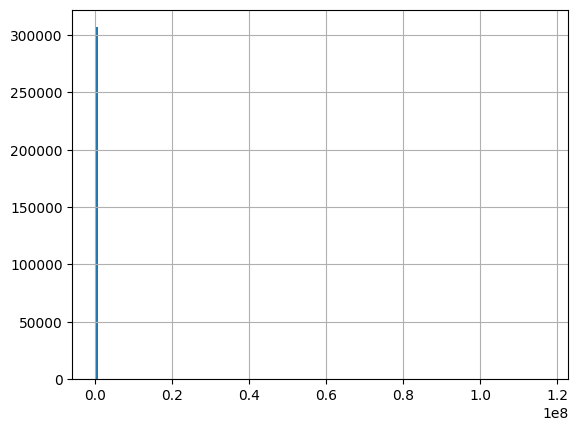

In [9]:
test['AMT_INCOME_TOTAL'].hist(bins=150)

In [10]:
# on cherche les variables catégorielles
var_num_train = []
var_cat = []
for variable in X_train.columns :
    if type(X_train.iloc[71,:][variable]) == str : #variable sans nulls
        var_cat = var_cat + [variable]
    else :
        var_num_train = var_num_train +[variable]

In [11]:
# Implémentation des valeurs les plus communes pour les catégorielles
X_train[var_cat] = X_train[var_cat].apply(lambda col: col.fillna(col.mode().iloc[0]))
X_train[var_cat].isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [12]:
#création de liste pour stocker les variables cat
cat = [X_train[var].mode().iloc[0] for var in var_cat]

# implémentation des données pour le test
for i in range(len(var_cat)):
    X_test.loc[X_test[var_cat[i]].isnull(),var_cat[i]]=cat[i]

In [13]:
#création de liste pour stocker les variables num
ma_liste = var_num_train
elements_a_enlever = ['SK_ID_CURR', 'TARGET']

nouvelle_liste = [x for x in ma_liste if x not in elements_a_enlever]
num = [X_train[var].median() for var in nouvelle_liste]

# implémentation des données pour le test
for i in range(len(nouvelle_liste)):
    X_test.loc[X_test[nouvelle_liste[i]].isnull(),nouvelle_liste[i]]=num[i]

In [14]:
X_train[nouvelle_liste] = X_train[nouvelle_liste].apply(lambda col: col.fillna(col.median()))
X_train[nouvelle_liste].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 104, dtype: int64

In [15]:
scaler = RobustScaler()

# Pipeline
pipeline_scal = Pipeline([
    ('robust_scaler', scaler)
])

In [16]:
# Normalisation
X = X_train[var_num_train].drop(columns=['SK_ID_CURR'])

# Initialisation et ajustement du scaler
scaler.fit(X)
pipeline_scal.fit(X)

# Transformation des données
transformed_data = scaler.transform(X)

# Création d'un nouveau DataFrame avec les données normalisées
normalized_df = pd.DataFrame(transformed_data, columns=X.columns, index=X.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test[var_num_train].drop(columns=['SK_ID_CURR'])),
                             columns=X.columns,
                             index=X_test.index)

In [17]:
enc = OrdinalEncoder()

# Pipeline
pipeline_enc = Pipeline([
    ('ordinal_encoder', enc)
])

# Encodage des variables catégorielles
enc.fit(X_train[var_cat])
pipeline_enc.fit(X_train[var_cat])

X_train[var_cat] = enc.transform(X_train[var_cat])
X_test[var_cat] = enc.transform(X_test[var_cat])


In [18]:
pd.concat([X_train[var_cat], normalized_df], axis=1)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
154431,0.0,0.0,0.0,0.0,6.0,3.0,4.0,5.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
93250,0.0,0.0,0.0,1.0,6.0,7.0,4.0,1.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160385,0.0,0.0,0.0,1.0,6.0,7.0,4.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,-0.5
868,0.0,0.0,0.0,0.0,1.0,7.0,4.0,3.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
186896,0.0,0.0,0.0,1.0,6.0,7.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259178,0.0,0.0,0.0,0.0,5.0,1.0,4.0,1.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.5
131932,0.0,1.0,1.0,1.0,6.0,7.0,1.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
146867,1.0,1.0,1.0,1.0,6.0,7.0,4.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
tmp2 = pd.concat([X_train[var_cat], normalized_df], axis=1)
tmp3 = pd.concat([tmp2, X_train['SK_ID_CURR']], axis=1)

tmp_test = pd.concat([X_test[var_cat], X_test_scaled], axis=1)
tmp_test_2 = pd.concat([tmp_test, X_test['SK_ID_CURR']], axis=1)
tmp_test_2


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
245895,0.0,1.0,1.0,0.0,6.0,1.0,4.0,1.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,384575
98194,0.0,0.0,1.0,1.0,6.0,1.0,1.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,214010
36463,0.0,0.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,142232
249923,0.0,0.0,0.0,1.0,6.0,4.0,4.0,5.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,389171
158389,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,283617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80690,0.0,1.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,193553
174247,0.0,1.0,0.0,0.0,6.0,7.0,4.0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,301928
287896,0.0,0.0,0.0,1.0,6.0,1.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,433507
186097,0.0,1.0,1.0,1.0,6.0,7.0,1.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,315743


In [20]:
# Calcul de l'écart type de chaque colonne
ecart_type = tmp3.std()

# Sélection des colonnes avec un écart type inférieur à 0.1
print("Shape df_train_enc :", tmp3.shape)
col_suppr = list(ecart_type[ecart_type < 0.1].index)
print("Nombre de colonnes supprimées :",len(col_suppr))

# Dataframe final
df_train_ok = tmp3.drop(columns=col_suppr)
print("Shape df_train_ok :",df_train_ok.shape)

Shape df_train_enc : (306511, 121)
Nombre de colonnes supprimées : 55
Shape df_train_ok : (306511, 66)


In [21]:
col_suppr

['EMERGENCYSTATE_MODE',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_1

<Axes: >

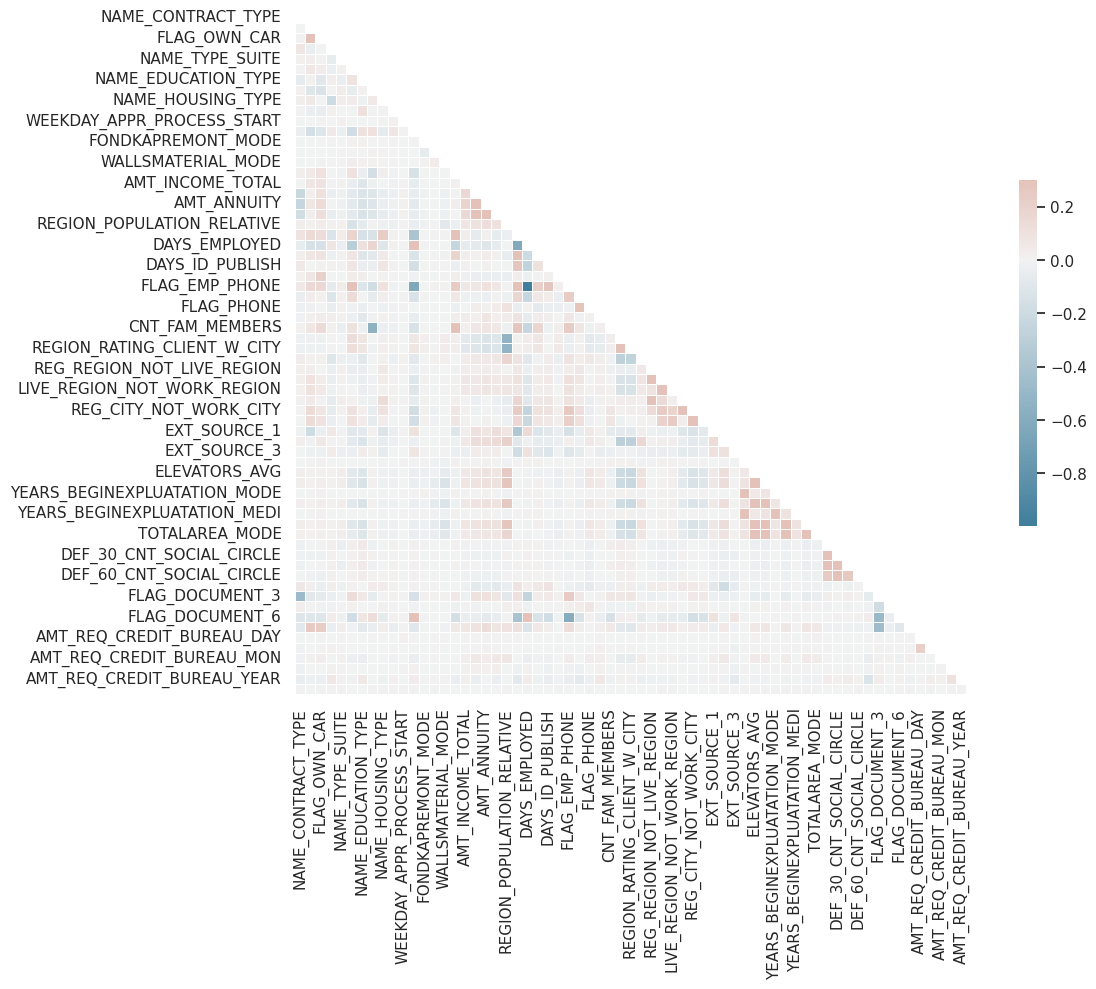

In [22]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_train_ok.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
corr

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
NAME_CONTRACT_TYPE,1.000000,-0.008529,0.004137,0.067110,0.012084,0.005439,-0.065067,0.011291,0.024187,0.001644,...,-0.479906,0.029461,-0.098780,-0.084922,-0.004922,-0.014655,-0.014232,-0.021483,-0.049714,0.001669
CODE_GENDER,-0.008529,1.000000,0.345811,-0.044377,0.029918,0.065075,0.009589,-0.099749,0.058739,-0.038121,...,-0.087179,0.003345,-0.100734,0.249396,0.000423,-0.002848,0.005676,-0.009614,-0.020592,-0.000796
FLAG_OWN_CAR,0.004137,0.345811,1.000000,-0.002780,0.004058,0.033216,-0.094014,-0.130998,-0.004181,-0.043717,...,-0.069955,-0.013634,-0.106125,0.228280,0.001346,0.002774,0.023385,-0.003938,-0.026110,0.001117
FLAG_OWN_REALTY,0.067110,-0.044377,-0.002780,1.000000,-0.050447,-0.026618,0.021939,0.000695,-0.199733,0.009927,...,-0.036902,-0.011834,0.041598,-0.035049,-0.009120,0.005798,-0.006314,0.011982,0.058554,0.000648
NAME_TYPE_SUITE,0.012084,0.029918,0.004058,-0.050447,1.000000,0.007266,-0.036626,0.037208,0.032263,-0.003757,...,-0.013698,0.004718,-0.019263,0.020886,0.002939,0.003481,0.011620,0.004759,0.011608,0.000879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,-0.014655,-0.002848,0.002774,0.005798,0.003481,-0.003702,-0.000068,-0.002926,-0.005700,0.004715,...,0.008359,0.001851,0.002491,0.000772,0.218943,1.000000,-0.007387,-0.007405,0.029288,0.001838
AMT_REQ_CREDIT_BUREAU_MON,-0.014232,0.005676,0.023385,-0.006314,0.011620,-0.026127,-0.034912,-0.008291,-0.006536,-0.011321,...,0.010867,0.006309,-0.021885,0.018236,-0.002765,-0.007387,1.000000,0.005250,0.013552,0.000298
AMT_REQ_CREDIT_BUREAU_QRT,-0.021483,-0.009614,-0.003938,0.011982,0.004759,-0.004901,0.000029,-0.001989,-0.008097,-0.000219,...,0.010152,-0.004086,0.009409,-0.002368,-0.001533,-0.007405,0.005250,1.000000,0.095626,0.000880
AMT_REQ_CREDIT_BUREAU_YEAR,-0.049714,-0.020592,-0.026110,0.058554,0.011608,-0.011780,0.057585,-0.004460,-0.015141,0.016975,...,0.046076,-0.009336,0.011191,-0.021524,0.000686,0.029288,0.013552,0.095626,1.000000,0.003925


In [24]:
threshold = 0.87

# Identifier les couples corrélés
correlated_variables = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            variable_name = corr.columns[i]
            correlated_variables.add((variable_name, corr.index[j]))
print("Couples corrélés :")
for pair in correlated_variables:
    print(pair)

Couples corrélés :
('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE')
('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT')
('FLOORSMAX_MEDI', 'FLOORSMAX_AVG')
('FLAG_EMP_PHONE', 'DAYS_EMPLOYED')
('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG')
('CNT_FAM_MEMBERS', 'CNT_CHILDREN')
('YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG')
('FLOORSMAX_MODE', 'FLOORSMAX_AVG')
('FLOORSMAX_MEDI', 'FLOORSMAX_MODE')


In [25]:
var_supprimer = set(pd.DataFrame(correlated_variables)[0])
len(var_supprimer)

9

In [26]:
X_train = df_train_ok.drop(columns = var_supprimer)

In [27]:
X_train.shape

(306511, 57)

In [28]:
X_test = tmp_test_2[list(X_train.columns)]

In [29]:
for col in X_train.columns:
    if X_train[col].dtype == 'float64':
        X_train[col] = X_train[col].astype('float32')
for col in X_train.columns:
    if X_train[col].dtype == 'int64':
        X_train[col] = X_train[col].astype('int32')
        
for col in X_test.columns:
    if X_test[col].dtype == 'float64':
        X_test[col] = X_test[col].astype('float32')
for col in X_test.columns:
    if X_test[col].dtype == 'int64':
        X_test[col] = X_test[col].astype('int32')

/tmp/ipykernel_47509/581397780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('float32')
/tmp/ipykernel_47509/581397780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('float32')
/tmp/ipykernel_47509/581397780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [30]:
X_test = X_test.set_index('SK_ID_CURR')
X_train = X_train.set_index('SK_ID_CURR')

In [31]:
colonnes = X_train.columns

# Classification

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import time
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [33]:
start = time.time()
# Définir le modèle 
lightgbm = lgb.LGBMClassifier(class_weight='balanced')

# Définir la grille des hyperparamètres à rechercher
param_grid = {'boosting_type' : ['gbdt'], 
              'num_leaves' : [5, 10, 31,4, 5],
              'max_depth' : [-1, 0, 10, 20], 
              'learning_rate' : [0.1, 0.5, 0.7]
              #n_estimators=100
             }


# Créer l'objet GridSearchCV
grid_search = GridSearchCV(lightgbm, param_grid, cv=5, scoring='roc_auc', verbose=5)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
accuracy = grid_search.score(X_test, y_test)
y_predict = grid_search.predict(X_test)
temps = time.time() - start

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.750 total time=   4.1s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you c

In [34]:
grid_search.best_score_, grid_search.best_params_

(0.7537277778772452,
 {'boosting_type': 'gbdt',
  'learning_rate': 0.1,
  'max_depth': -1,
  'num_leaves': 31})

In [35]:
grid_search.best_estimator_.score(X_test, y_test)

0.695

<Axes: >

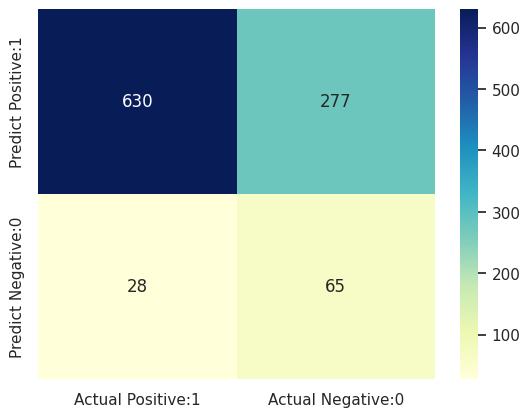

In [36]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
Précision = 637/(637+270)
Précision

0.7023153252480706

In [38]:
df_pred = pd.DataFrame(grid_search.predict_proba(X_test))
def prediction(row):
    if row[1]>=0.75 :
         return 1
    else :
        return 0

df_pred['pred_reel'] = df_pred.apply(lambda row : prediction(row),axis=1)

<Axes: >

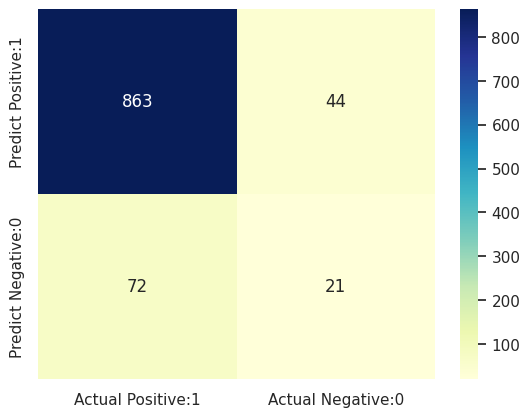

In [39]:
cm = confusion_matrix(y_test, df_pred['pred_reel'])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [40]:
Précision2 = 862/(862+45)
Précision2

0.9503858875413451

In [41]:
type(grid_search.best_estimator_.booster_)
shap_values = shap.TreeExplainer(grid_search.best_estimator_.booster_).shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


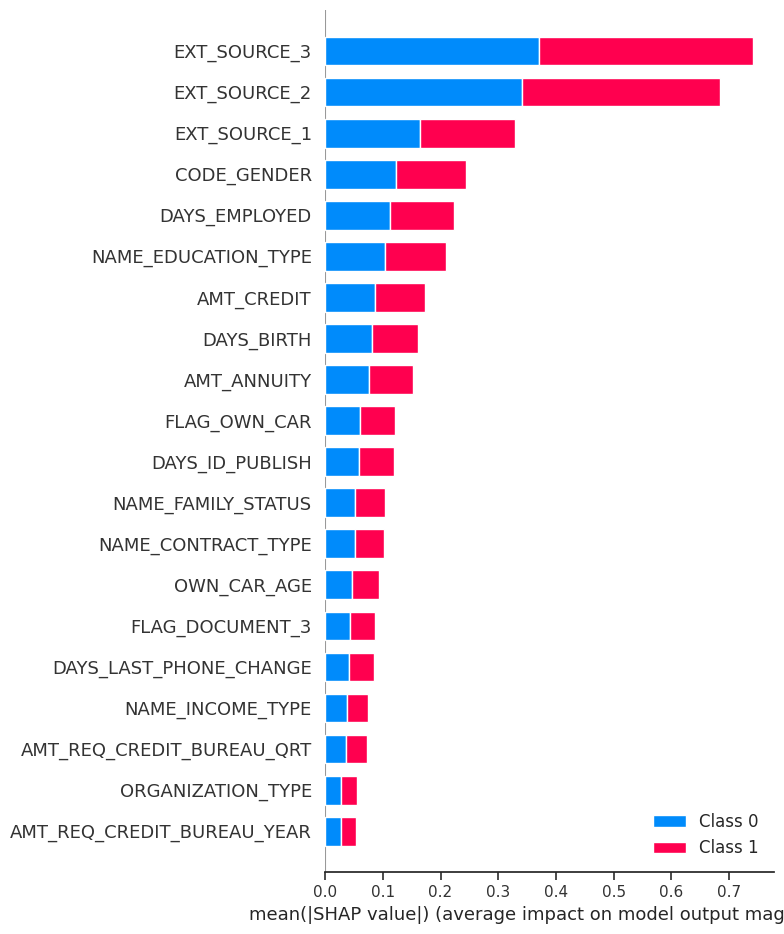

In [42]:
shap.summary_plot(shap_values, X_train)

In [43]:
shap_values

[array([[-0.01044461,  0.14549317, -0.04075768, ..., -0.00781755,
         -0.01290384, -0.01339662],
        [-0.03162796,  0.09547261, -0.03725806, ..., -0.00252162,
         -0.03184823, -0.00439623],
        [-0.02675063,  0.10229843, -0.04042083, ...,  0.05513771,
         -0.03144079,  0.03219215],
        ...,
        [-0.05779423, -0.11985062,  0.07002964, ...,  0.02420367,
         -0.0363126 , -0.00665458],
        [ 0.25951247, -0.09293169,  0.07279659, ..., -0.00326049,
         -0.00814551,  0.00348063],
        [-0.03269127, -0.10524349,  0.08019524, ...,  0.01137324,
         -0.02135619,  0.03364697]]),
 array([[ 0.01044461, -0.14549317,  0.04075768, ...,  0.00781755,
          0.01290384,  0.01339662],
        [ 0.03162796, -0.09547261,  0.03725806, ...,  0.00252162,
          0.03184823,  0.00439623],
        [ 0.02675063, -0.10229843,  0.04042083, ..., -0.05513771,
          0.03144079, -0.03219215],
        ...,
        [ 0.05779423,  0.11985062, -0.07002964, ..., -

# Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from lightgbm import LGBMClassifier  # Assurez-vous d'avoir correctement importé LGBMClassifier

In [45]:
pipeline = Pipeline([
    ('classifier', LGBMClassifier(**grid_search.best_params_))  # Assurez-vous que grid_search.best_params_ est correct
])

In [46]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 24732, number of negative: 281779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.164943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 306511, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080689 -> initscore=-2.433025
[LightGBM] [Info] Start training from score -2.433025


Pipeline(steps=[('classifier', LGBMClassifier())])

In [47]:
pipeline.score(X_test, y_test)

0.905

In [48]:
import joblib

In [49]:
joblib.dump(pipeline, 'pipeline_classifier.pkl')
joblib.dump(pipeline_enc, 'pipeline_encod.pkl')
joblib.dump(pipeline_scal, 'pipeline_scaler.pkl')

['pipeline_scaler.pkl']

In [50]:
var_num_train.remove('SK_ID_CURR')

In [51]:
joblib.dump(var_cat, 'var_cat.pkl')
joblib.dump(var_num_train, 'var_num.pkl')
joblib.dump(shap_values, 'shap_values.pkl')
joblib.dump(colonnes, 'colonnes.pkl')


['colonnes.pkl']

In [52]:
joblib.dump(var_num_train, 'var_num.pkl')


['var_num.pkl']

In [53]:
var_num_train

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [54]:
dict(X_test.iloc[0,:])

{'NAME_CONTRACT_TYPE': 0.0,
 'CODE_GENDER': 1.0,
 'FLAG_OWN_CAR': 1.0,
 'FLAG_OWN_REALTY': 0.0,
 'NAME_TYPE_SUITE': 6.0,
 'NAME_INCOME_TYPE': 1.0,
 'NAME_EDUCATION_TYPE': 4.0,
 'NAME_FAMILY_STATUS': 1.0,
 'NAME_HOUSING_TYPE': 1.0,
 'OCCUPATION_TYPE': 14.0,
 'WEEKDAY_APPR_PROCESS_START': 4.0,
 'ORGANIZATION_TYPE': 5.0,
 'FONDKAPREMONT_MODE': 2.0,
 'HOUSETYPE_MODE': 0.0,
 'WALLSMATERIAL_MODE': 4.0,
 'CNT_CHILDREN': 2.0,
 'AMT_INCOME_TOTAL': 0.66,
 'AMT_CREDIT': -0.08924812,
 'AMT_ANNUITY': 1.5348606,
 'REGION_POPULATION_RELATIVE': -0.4941845,
 'DAYS_BIRTH': 0.33769092,
 'DAYS_EMPLOYED': 0.1829219,
 'DAYS_REGISTRATION': 0.70719445,
 'DAYS_ID_PUBLISH': -0.40829778,
 'OWN_CAR_AGE': 10.0,
 'FLAG_WORK_PHONE': 0.0,
 'FLAG_PHONE': 0.0,
 'FLAG_EMAIL': 0.0,
 'REGION_RATING_CLIENT': 0.0,
 'HOUR_APPR_PROCESS_START': -0.25,
 'REG_REGION_NOT_LIVE_REGION': 0.0,
 'REG_REGION_NOT_WORK_REGION': 0.0,
 'LIVE_REGION_NOT_WORK_REGION': 0.0,
 'REG_CITY_NOT_LIVE_CITY': 0.0,
 'REG_CITY_NOT_WORK_CITY': 1.0,
 'LIV

In [55]:
pipeline.predict_proba(X_test)

array([[0.84906325, 0.15093675],
       [0.96759612, 0.03240388],
       [0.82759873, 0.17240127],
       ...,
       [0.89963503, 0.10036497],
       [0.97949156, 0.02050844],
       [0.96671555, 0.03328445]])

In [56]:
liste_col = list(X_test.columns)

In [57]:
type(list(X_test.index)[0])

int

In [58]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,0.0,1.0,1.0,0.0,6.0,1.0,4.0,1.0,1.0,14.0,...,0.582562,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
214010,0.0,0.0,1.0,1.0,6.0,1.0,1.0,3.0,1.0,10.0,...,-0.242284,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
142232,0.0,0.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,14.0,...,-0.523148,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
389171,0.0,0.0,0.0,1.0,6.0,4.0,4.0,5.0,1.0,6.0,...,-0.959105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5
283617,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.450617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193553,0.0,1.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,4.0,...,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
301928,0.0,1.0,0.0,0.0,6.0,7.0,4.0,1.0,1.0,9.0,...,-1.356481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
433507,0.0,0.0,0.0,1.0,6.0,1.0,4.0,3.0,1.0,8.0,...,0.259259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [59]:
X_test.to_csv('data_.csv') 
y_test.to_csv('target.csv') 
X_train.to_csv('X_train.csv') 
y_train.to_csv('y_train.csv') 

In [60]:
list(pd.concat([X_test,y_test], axis=1).loc[pd.concat([X_test,y_test], axis=1)['TARGET']==0].mean())

[0.09151047468185425,
 0.35060638189315796,
 0.3539139926433563,
 0.6890848875045776,
 5.267916202545166,
 4.742006778717041,
 3.127894163131714,
 1.4222712516784668,
 1.2524807453155518,
 7.971333980560303,
 3.042998790740967,
 30.541345596313477,
 1.9845645427703857,
 0.013230429962277412,
 4.111356258392334,
 0.43880927562713623,
 0.2298172116279602,
 0.15837088227272034,
 0.13350264728069305,
 0.1465906947851181,
 -0.0445447601377964,
 27.85851287841797,
 -0.06981322169303894,
 0.08669419586658478,
 1.2293274402618408,
 0.20617419481277466,
 0.2976846694946289,
 0.06394708156585693,
 0.05512678995728493,
 0.013230429962277412,
 0.009922822937369347,
 0.04299889877438545,
 0.0385887548327446,
 0.06615214794874191,
 0.20617419481277466,
 0.17640572786331177,
 -0.002451373729854822,
 -0.1668424755334854,
 -0.057500917464494705,
 0.45137819647789,
 0.04375920444726944,
 0.037144653499126434,
 6.903366565704346,
 0.7089305520057678,
 0.1245865523815155,
 0.09040793776512146,
 -0.1257222

In [61]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,0.0,1.0,1.0,0.0,6.0,1.0,4.0,1.0,1.0,14.0,...,0.582562,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
214010,0.0,0.0,1.0,1.0,6.0,1.0,1.0,3.0,1.0,10.0,...,-0.242284,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
142232,0.0,0.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,14.0,...,-0.523148,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
389171,0.0,0.0,0.0,1.0,6.0,4.0,4.0,5.0,1.0,6.0,...,-0.959105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5
283617,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.450617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193553,0.0,1.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,4.0,...,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
301928,0.0,1.0,0.0,0.0,6.0,7.0,4.0,1.0,1.0,9.0,...,-1.356481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
433507,0.0,0.0,0.0,1.0,6.0,1.0,4.0,3.0,1.0,8.0,...,0.259259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [62]:
X_test.loc[301928,:]

NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     1.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
NAME_TYPE_SUITE                 6.000000
NAME_INCOME_TYPE                7.000000
NAME_EDUCATION_TYPE             4.000000
NAME_FAMILY_STATUS              1.000000
NAME_HOUSING_TYPE               1.000000
OCCUPATION_TYPE                 9.000000
WEEKDAY_APPR_PROCESS_START      5.000000
ORGANIZATION_TYPE              45.000000
FONDKAPREMONT_MODE              2.000000
HOUSETYPE_MODE                  0.000000
WALLSMATERIAL_MODE              5.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL               -0.240000
AMT_CREDIT                      0.058496
AMT_ANNUITY                     0.035110
REGION_POPULATION_RELATIVE      0.638098
DAYS_BIRTH                      0.373469
DAYS_EMPLOYED                   0.280049
DAYS_REGISTRATION              -0.422159
DAYS_ID_PUBLISH                -0.407135
OWN_CAR_AGE     

In [63]:
pd.DataFrame([0,21,2,3,4,4], columns=['id'], index=[0,21,2,3,4,4]).T

,0,21,2,3,4,4
id,0,21,2,3,4,4


In [64]:
dict(dX_test.loc[98194])

{'SK_ID_CURR': 214010,
 'NAME_CONTRACT_TYPE': 'Cash loans',
 'CODE_GENDER': 'F',
 'FLAG_OWN_CAR': 'Y',
 'FLAG_OWN_REALTY': 'Y',
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 247500.0,
 'AMT_CREDIT': 1281712.5,
 'AMT_ANNUITY': 48946.5,
 'AMT_GOODS_PRICE': 1179000.0,
 'NAME_TYPE_SUITE': 'Unaccompanied',
 'NAME_INCOME_TYPE': 'Commercial associate',
 'NAME_EDUCATION_TYPE': 'Higher education',
 'NAME_FAMILY_STATUS': 'Single / not married',
 'NAME_HOUSING_TYPE': 'House / apartment',
 'REGION_POPULATION_RELATIVE': 0.006852,
 'DAYS_BIRTH': -14778,
 'DAYS_EMPLOYED': -1141,
 'DAYS_REGISTRATION': -1610.0,
 'DAYS_ID_PUBLISH': -4546,
 'OWN_CAR_AGE': 11.0,
 'FLAG_MOBIL': 1,
 'FLAG_EMP_PHONE': 1,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 1,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 1,
 'OCCUPATION_TYPE': 'Managers',
 'CNT_FAM_MEMBERS': 1.0,
 'REGION_RATING_CLIENT': 3,
 'REGION_RATING_CLIENT_W_CITY': 3,
 'WEEKDAY_APPR_PROCESS_START': 'THURSDAY',
 'HOUR_APPR_PROCESS_START': 10,
 'REG_REGION_NOT_LIVE_REGION': 0,
 '

In [65]:
dX_test[dX_test.notna().all(axis=1)].index

Index([ 98194,  42613,  56266, 191304, 264145,  32706,  80510, 238607, 146518,
       144721, 304283, 107540,  43277, 166206,  86857, 161054, 183795,  83311],
      dtype='int64')

In [66]:
dX_test.loc[42613]

SK_ID_CURR                        149325
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            M
FLAG_OWN_CAR                           Y
FLAG_OWN_REALTY                        N
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY            0.0
AMT_REQ_CREDIT_BUREAU_WEEK           0.0
AMT_REQ_CREDIT_BUREAU_MON            0.0
AMT_REQ_CREDIT_BUREAU_QRT            1.0
AMT_REQ_CREDIT_BUREAU_YEAR           4.0
Name: 42613, Length: 121, dtype: object